In [731]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [732]:
import warnings
warnings.filterwarnings('ignore')

In [733]:
pd.set_option('display.max_columns',None) # show all columns

In [734]:
### Step 1: Reading and Understanding the Data

In [735]:
df=pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [736]:
# To find the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [737]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [738]:
# Basic Stats
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Step 2 : Data Cleaning and Preparation

In [739]:
#Splitting company name from CarName column
CompanyName=df['CarName'].apply(lambda x: x.split()[0])
df.insert(3,'CompanyName', CompanyName)
df.drop(['CarName'], axis=1, inplace=True)

In [740]:
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [741]:
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

##### Fixing invalid values
- There seems to be some spelling error in the CompanyName column.

    - `maxda` = `mazda`
    - `Nissan` = `nissan`
    - `porsche` = `porcshce`
    - `toyota` = `toyouta`
    - `vokswagen` = `volkswagen` =  `vw`

In [742]:
df['CompanyName']=df['CompanyName'].str.lower()

def replace_name (a,b):
    df['CompanyName'].replace(a,b,inplace=True)
    
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [743]:
#Checking for duplicates
df.loc[df.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [744]:
df.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [745]:
#Fuel economy
df['fueleconomy'] = (0.55 * df['citympg']) + (0.45 * df['highwaympg'])

In [746]:
#Binning the Car Companies based on avg prices of each Company.
df['price'] = df['price'].astype('int')
temp = df.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
x=['Budget','Medium','Highend']
df['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=x)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


In [747]:
new_df = df[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
new_df.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


### Step 6 : Dummy Variables

In [748]:
new_df=pd.get_dummies(new_df,columns=['fueltype'], drop_first=True)
new_df=pd.get_dummies(new_df,columns=['aspiration'], drop_first=True)
new_df=pd.get_dummies(new_df,columns=['carbody'], drop_first=True)
new_df=pd.get_dummies(new_df,columns=['drivewheel'], drop_first=True)
new_df=pd.get_dummies(new_df,columns=['enginetype'], drop_first=True)
new_df=pd.get_dummies(new_df,columns=['cylindernumber'], drop_first=True)
new_df=pd.get_dummies(new_df,columns=['carsrange'], drop_first=True)


In [749]:
new_df

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carsrange_Medium,carsrange_Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845,109.1,2952,141,3.78,114,25.25,188.8,68.9,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0
201,19045,109.1,3049,141,3.78,160,21.70,188.8,68.8,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0
202,21485,109.1,3012,173,3.58,134,20.25,188.8,68.9,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
203,22470,109.1,3217,145,3.01,106,26.45,188.8,68.9,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0


<AxesSubplot:>

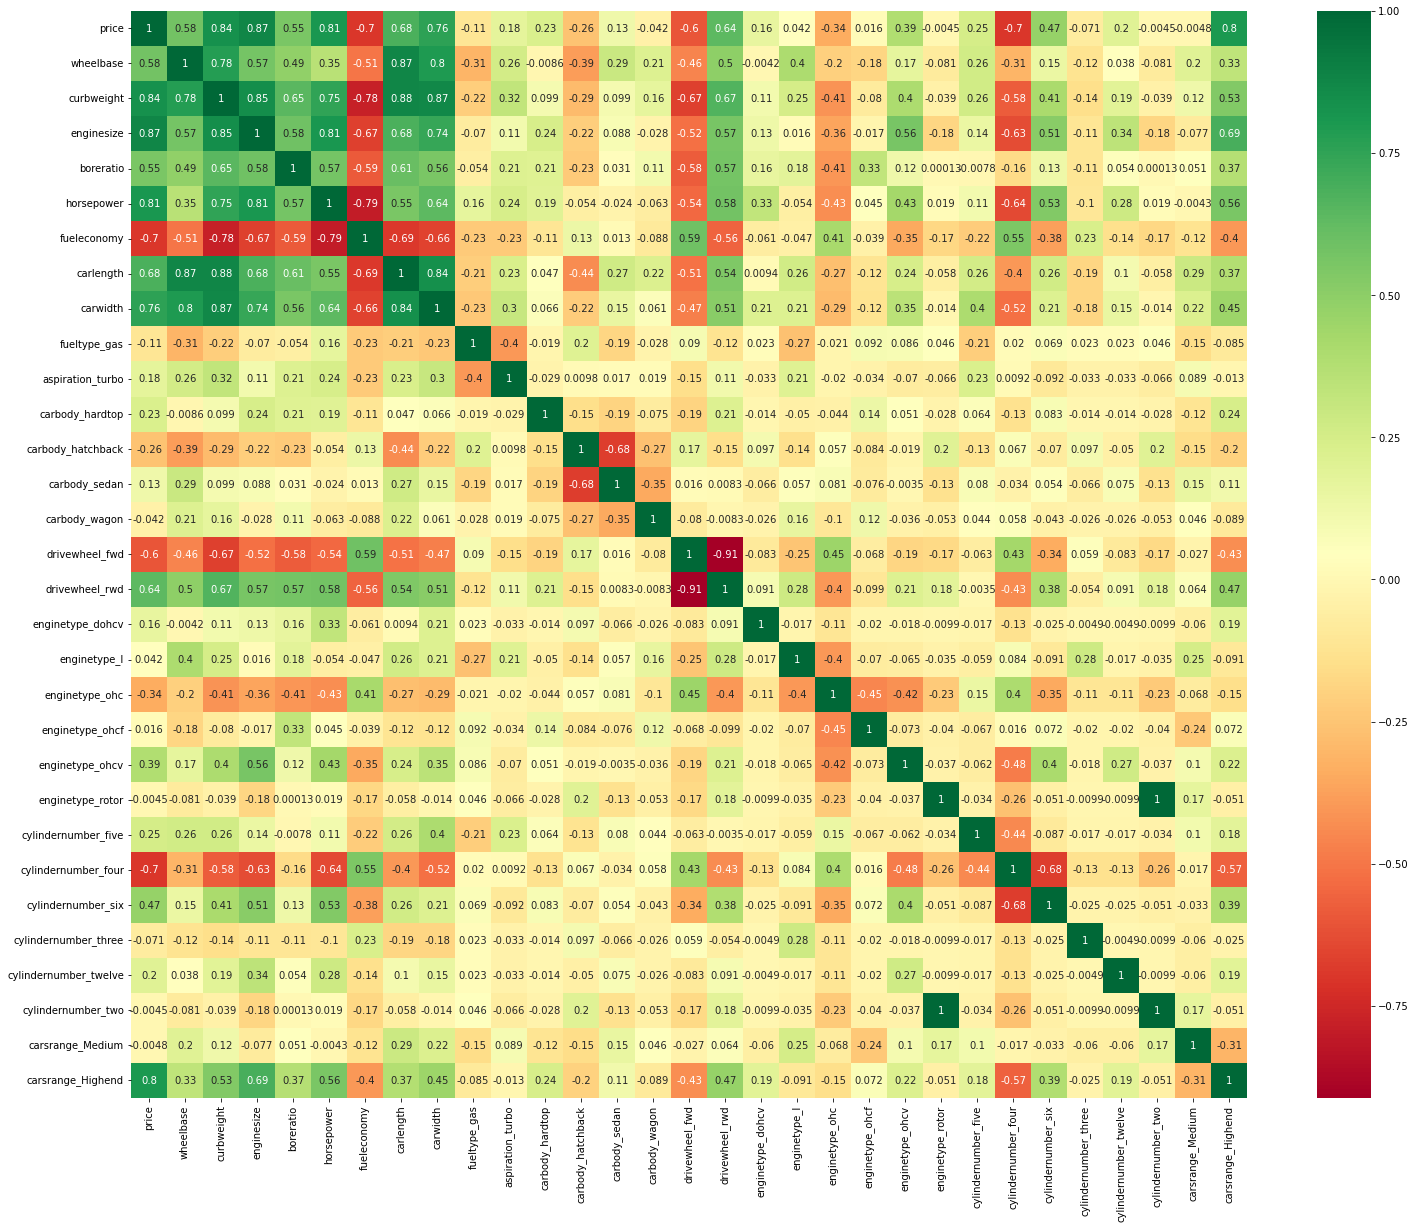

In [750]:
plt.figure(figsize=(25,20))
sns.heatmap(new_df.corr(),annot=True, cmap='RdYlGn')

Highly correlated variables to price are - `curbweight`, `enginesize`, `horsepower`,`carwidth` and `highend`.

In [751]:
new_df

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carsrange_Medium,carsrange_Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845,109.1,2952,141,3.78,114,25.25,188.8,68.9,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0
201,19045,109.1,3049,141,3.78,160,21.70,188.8,68.8,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0
202,21485,109.1,3012,173,3.58,134,20.25,188.8,68.9,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
203,22470,109.1,3217,145,3.01,106,26.45,188.8,68.9,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0


In [752]:
new_df.columns

Index(['price', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'fueleconomy', 'carlength', 'carwidth', 'fueltype_gas',
       'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'carsrange_Medium',
       'carsrange_Highend'],
      dtype='object')

['price', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'fueleconomy', 'carlength', 'carwidth', 'fueltype_gas',
       'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'carsrange_Medium',
       'carsrange_Highend']

In [753]:
# splitting the data into independent variable and dependent variable
X=new_df.loc[:, ['curbweight',
       'horsepower', 'fueleconomy', 'carwidth', 
        'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 
       'enginetype_dohcv',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'carsrange_Medium',
       'carsrange_Highend']]
y=new_df.loc[:, ['price']]

In [754]:
X.head()

,curbweight,horsepower,fueleconomy,carwidth,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carsrange_Medium,carsrange_Highend
0,2548,111,23.70,64.1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2548,111,23.70,64.1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2823,154,22.15,65.5,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
3,2337,102,26.70,66.2,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
4,2824,115,19.80,66.4,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0


In [755]:
y.head()

,price
0,13495
1,16500
2,16500
3,13950
4,17450


In [756]:
# pre-processing part 4 - feature scaling (Independent variable)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_sc=scaler.fit_transform(X)


In [757]:
X_sc=pd.DataFrame(X_sc,columns=X.columns)
X_sc.head()

,curbweight,horsepower,fueleconomy,carwidth,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carsrange_Medium,carsrange_Highend
0,-0.014566,0.174483,-0.604374,-0.844782,-0.201517,-0.720082,-0.938474,-0.372678,-0.070014,-0.260208,-0.141069,-0.238120,0.537874,-0.364138,-0.070014,-0.070014,-0.141069,1.176317,-0.364138
1,-0.014566,0.174483,-0.604374,-0.844782,-0.201517,-0.720082,-0.938474,-0.372678,-0.070014,-0.260208,-0.141069,-0.238120,0.537874,-0.364138,-0.070014,-0.070014,-0.141069,1.176317,-0.364138
2,0.514882,1.264536,-0.838056,-0.190566,-0.201517,1.388730,-0.938474,-0.372678,-0.070014,3.843076,-0.141069,-0.238120,-1.859172,2.746210,-0.070014,-0.070014,-0.141069,1.176317,-0.364138
3,-0.420797,-0.053668,-0.152086,0.136542,-0.201517,-0.720082,1.065559,-0.372678,-0.070014,-0.260208,-0.141069,-0.238120,0.537874,-0.364138,-0.070014,-0.070014,-0.141069,1.176317,-0.364138
4,0.516807,0.275883,-1.192348,0.230001,-0.201517,-0.720082,1.065559,-0.372678,-0.070014,-0.260208,-0.141069,4.199567,-1.859172,-0.364138,-0.070014,-0.070014,-0.141069,1.176317,-0.364138


In [758]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = X_sc

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
vif['Features'] = X_sc.columns

In [759]:
vif
# there is multicollinearity in this dataset. we can cosider VIF only when the value is greater then 5 

,Variance Inflation Factor,Features
0,9.024890,curbweight
1,7.412508,horsepower
2,5.235786,fueleconomy
3,7.098764,carwidth
4,2.396778,carbody_hardtop
5,10.072173,carbody_hatchback
6,10.552304,carbody_sedan
7,5.292966,carbody_wagon
8,2.047046,enginetype_dohcv
9,3.111545,enginetype_ohcv


In [760]:
# Drop variables whose factor is more than 5

In [761]:
new_X=X_sc.drop(['curbweight','horsepower','carwidth','carbody_hatchback','carbody_sedan','cylindernumber_five'
                ,'cylindernumber_four','cylindernumber_six'], axis=1)

In [762]:
new_X.head()

,fueleconomy,carbody_hardtop,carbody_wagon,enginetype_dohcv,enginetype_ohcv,enginetype_rotor,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carsrange_Medium,carsrange_Highend
0,-0.604374,-0.201517,-0.372678,-0.070014,-0.260208,-0.141069,-0.070014,-0.070014,-0.141069,1.176317,-0.364138
1,-0.604374,-0.201517,-0.372678,-0.070014,-0.260208,-0.141069,-0.070014,-0.070014,-0.141069,1.176317,-0.364138
2,-0.838056,-0.201517,-0.372678,-0.070014,3.843076,-0.141069,-0.070014,-0.070014,-0.141069,1.176317,-0.364138
3,-0.152086,-0.201517,-0.372678,-0.070014,-0.260208,-0.141069,-0.070014,-0.070014,-0.141069,1.176317,-0.364138
4,-1.192348,-0.201517,-0.372678,-0.070014,-0.260208,-0.141069,-0.070014,-0.070014,-0.141069,1.176317,-0.364138


In [763]:
new_X.columns

Index(['fueleconomy', 'carbody_hardtop', 'carbody_wagon', 'enginetype_dohcv',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'carsrange_Medium',
       'carsrange_Highend'],
      dtype='object')

### Step 7 : Train-Test Split and feature scaling

In [782]:
# Split the data into training and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(new_X,y, test_size=0.25, random_state=101)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(153, 18)
(52, 18)
(153, 1)
(52, 1)


In [783]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [784]:
model.coef_

array([[ 1.67258809e+03,  2.67933540e+03,  6.20661974e+02,
         1.23557367e+03, -1.32961454e+03, -1.04843478e+03,
        -9.02477509e+02, -1.18404033e+03, -1.19221549e+03,
        -6.09749776e+02, -2.12905919e+03, -4.73763347e+03,
        -2.43903705e+03,  9.09494702e-13, -4.64661436e+02,
        -6.09749776e+02,  6.16518511e+02,  2.60564645e+03]])

In [785]:
model.intercept_

array([13236.97732246])

In [786]:
y_pred=model.predict(X_test)


In [787]:
model.score(X_train, y_train)

0.9566414715003942

In [788]:
model.score(X_test, y_test)

0.8766332008393615

In [789]:
from sklearn import metrics

In [790]:
metrics.r2_score(y_test, y_pred)

0.8766332008393615

In [791]:
import statsmodels.api as sm

In [792]:
result = sm.OLS(y_train,X_train).fit()

In [793]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     187.5
Date:                Sat, 17 Sep 2022   Prob (F-statistic):           3.06e-84
Time:                        17:04:19   Log-Likelihood:                -1347.5
No. Observations:                 153   AIC:                             2729.
Df Residuals:                     136   BIC:                             2781.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
curbweight             1672.58

In [779]:
new_X=X_sc.drop(['carbody_wagon'], axis=1)

In [780]:
new_X=X_sc.drop(['carbody_hardtop'], axis=1)

In [781]:
# After drop above variables re fit the model

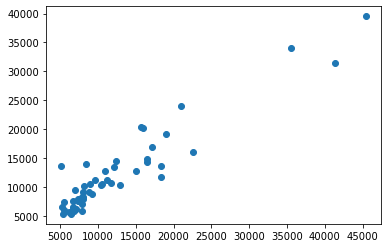

In [794]:
plt.scatter(y_test, y_pred)

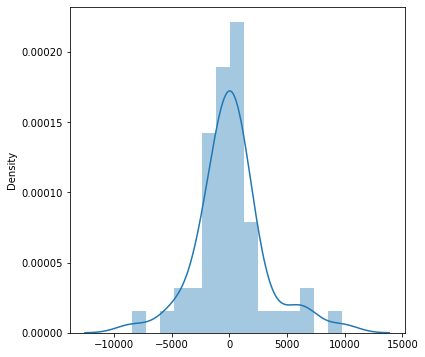

In [795]:
plt.figure(figsize = (6,6))
sns.distplot(y_test-y_pred)
plt.show()